In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Q1
data = pd.read_csv(r'C:\Users\ahmed\Downloads\Cutlets.csv')
data

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [3]:
data.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


In [5]:
data.duplicated().sum()

0

<Axes: xlabel='Unit B', ylabel='Density'>

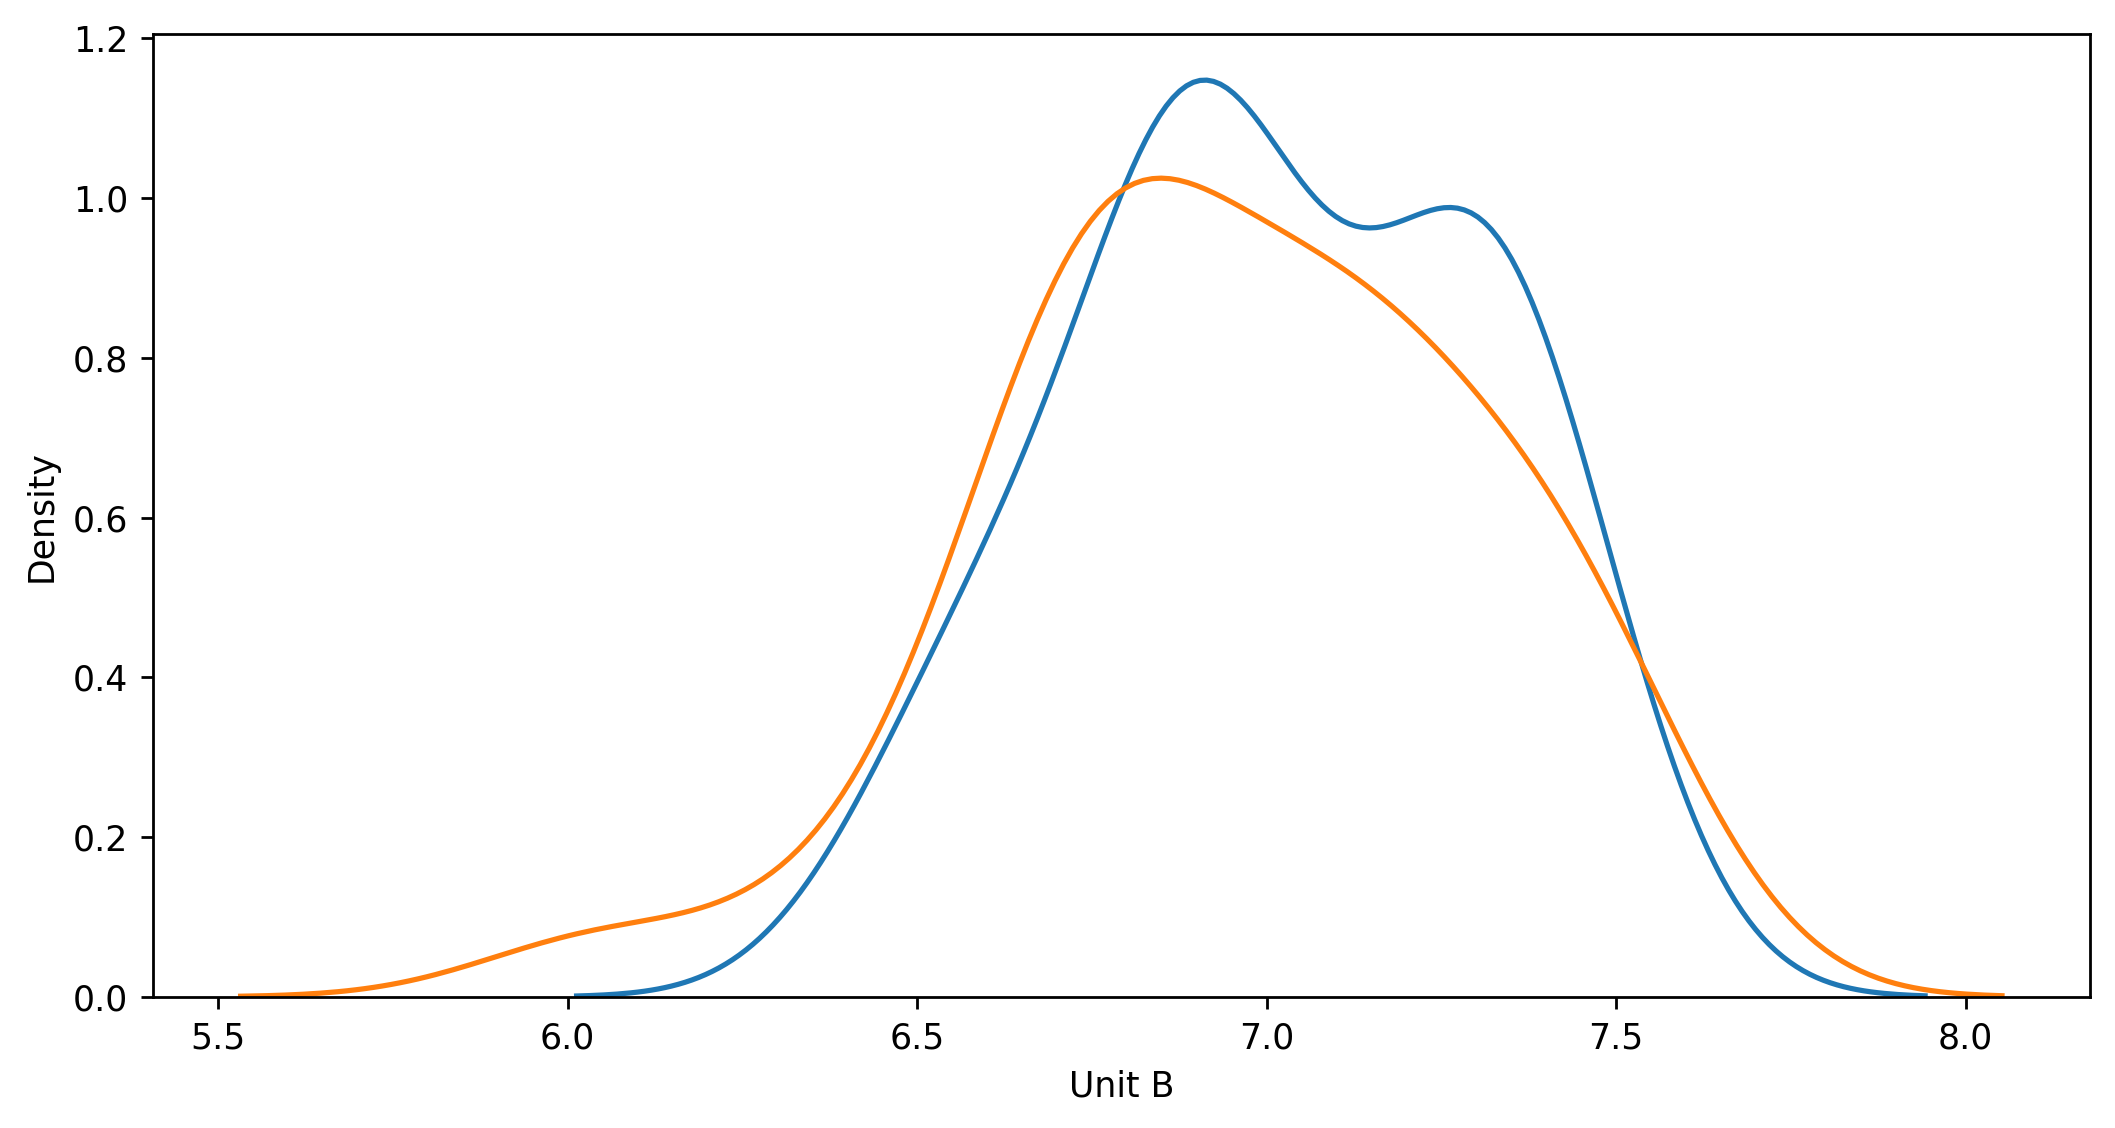

In [6]:
sns.distplot(data['Unit A'] , hist = False)
sns.distplot(data['Unit B'] , hist = False)

In [7]:
''' We are Provided with 2 samples(Unit A, Unit B)
The data is for a collection of sample
The following Problem statement could resoled by Two sample t_test
'''

' We are Provided with 2 samples(Unit A, Unit B)\nThe data is for a collection of sample\nThe following Problem statement could resoled by Two sample t_test\n'

In [8]:
# The manager wants to determine any signifiant difference in the diameter of cutlets between both Units
µ1 = data['Unit A'].mean()
µ1

7.0190914285714285

In [9]:
µ2 = data['Unit B'].mean()
µ2

6.964297142857142

In [10]:
''' Two sample t test states that 
Ho => µ1 = µ2 
Ha => µ1 ≠ µ2
Given significant level α = 0.05
if p < α (Reject Ho)
   p > α (Fail to Reject Ho)
'''

' Two sample t test states that \nHo => µ1 = µ2 \nHa => µ1 ≠ µ2\nGiven significant level α = 0.05\nif p < α (Reject Ho)\n   p > α (Fail to Reject Ho)\n'

In [11]:
s, p = stats.ttest_ind(data['Unit A'], data['Unit B'])

In [12]:
s, p

(0.7228688704678063, 0.4722394724599501)

In [13]:
p

0.4722394724599501

In [14]:
α = 0.05

In [15]:
if p < 0.05 :
    print('There is a significant difference.')
else:
    print('There is no significant difference.')
    

There is no significant difference.


In [16]:
#Q2
TAT_report = pd.read_csv(r'C:\Users\ahmed\Downloads\LabTAT.csv')
TAT_report

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [17]:
TAT_report.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [18]:
TAT_report.isna().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

<Axes: >

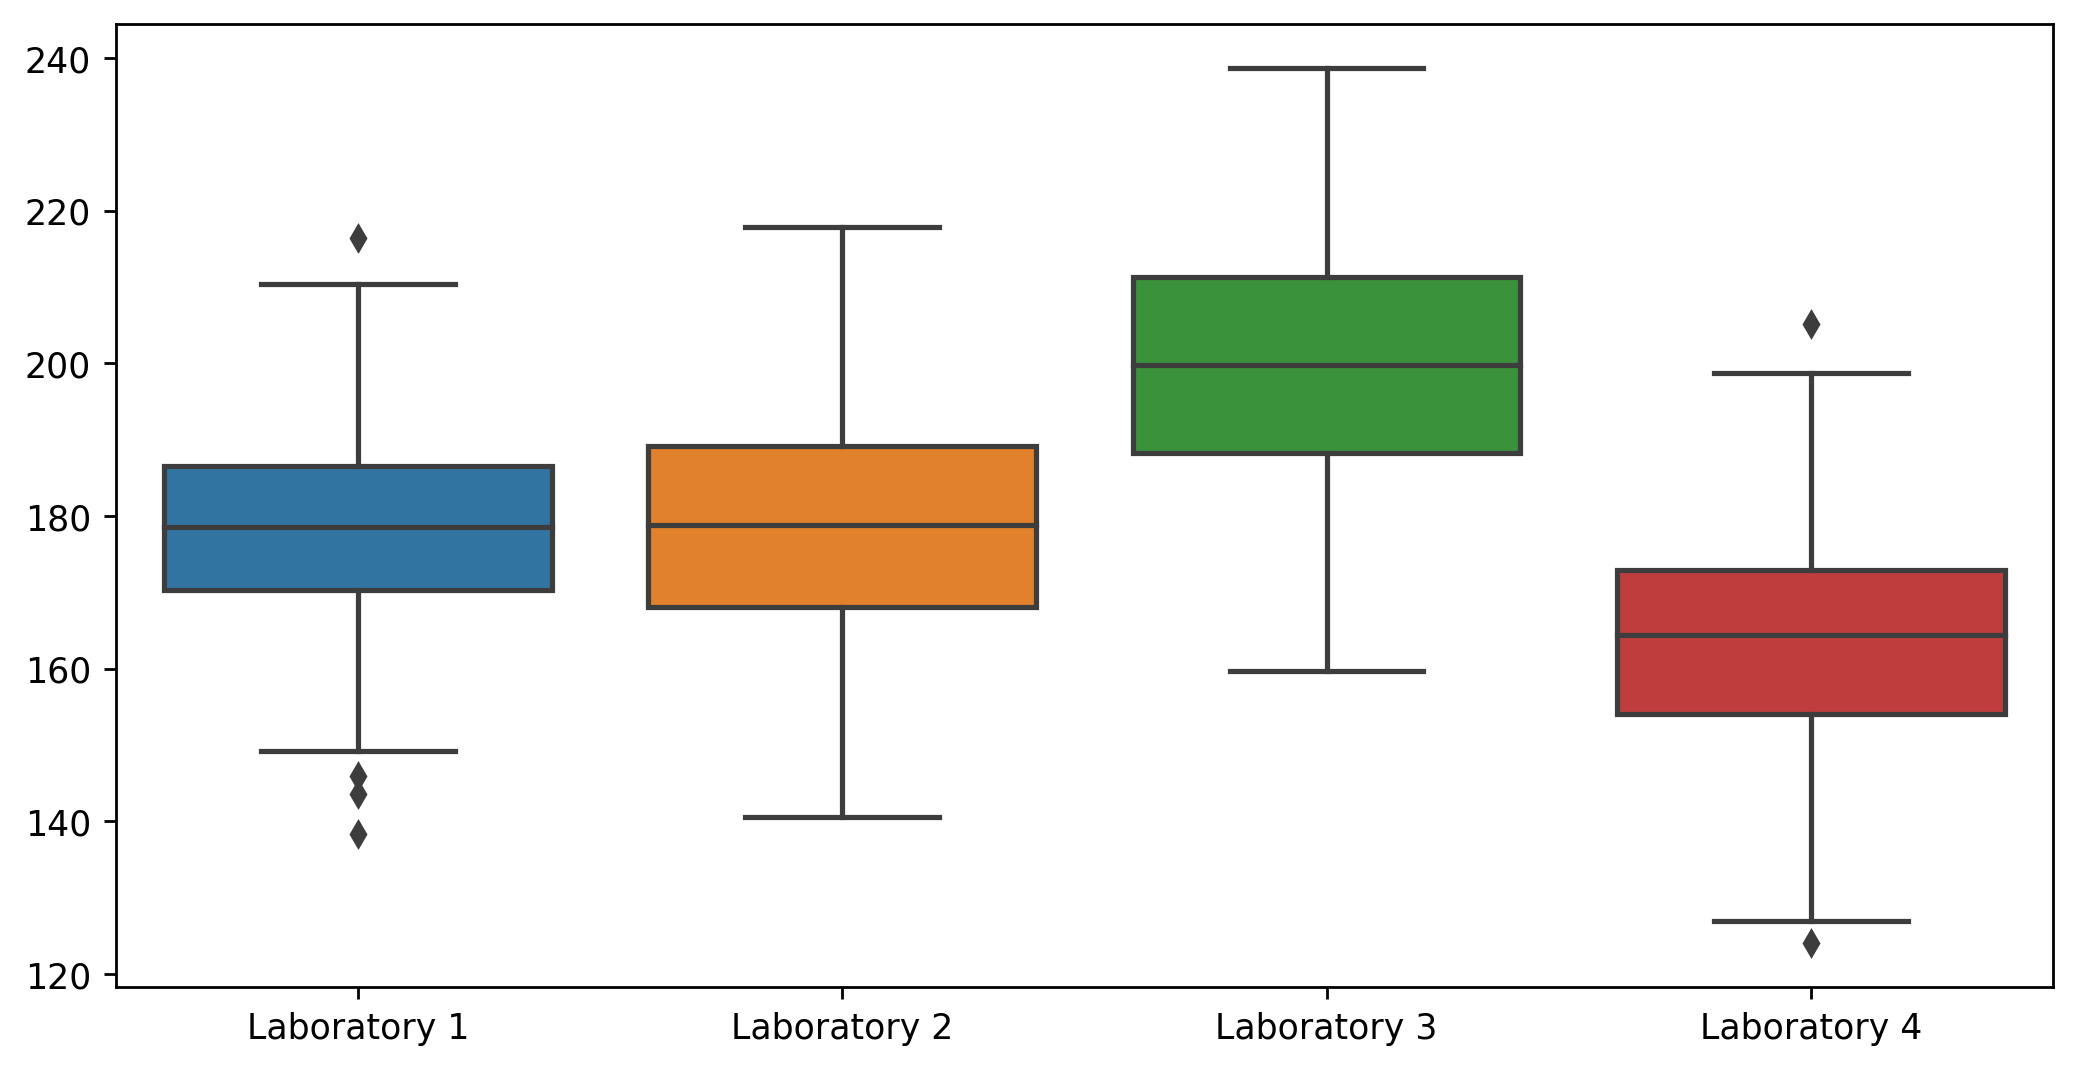

In [19]:
sns.boxplot(TAT_report)

In [20]:
TAT_report.skew()

Laboratory 1   -0.177091
Laboratory 2    0.040659
Laboratory 3    0.133584
Laboratory 4   -0.104030
dtype: float64

In [21]:
# we can see that Lab1 and Lab4 both consist of Outliers

In [22]:
#Outlier detection & replace
def outlier_detection(colname):
    q1 = TAT_report['Laboratory 1'].quantile(0.25)
    q3 = TAT_report['Laboratory 1'].quantile(0.75)
    iqr = q3 - q1
    lower = (q1 - 1.5 * iqr)
    upper = (q3 + 1.5 * iqr)
    return lower, upper                                         

In [23]:
l1, u1 = outlier_detection(TAT_report['Laboratory 1'])
l1

146.03500000000003

In [24]:
u1

210.83499999999998

In [25]:
#Filtering Outliers & Replacing the Values with Capping
TAT_report.loc[TAT_report['Laboratory 1'] > u1, 'Laboratory 1'] = u1

In [26]:
TAT_report.loc[TAT_report['Laboratory 1'] < l1, 'Laboratory 1'] = l1

<Axes: >

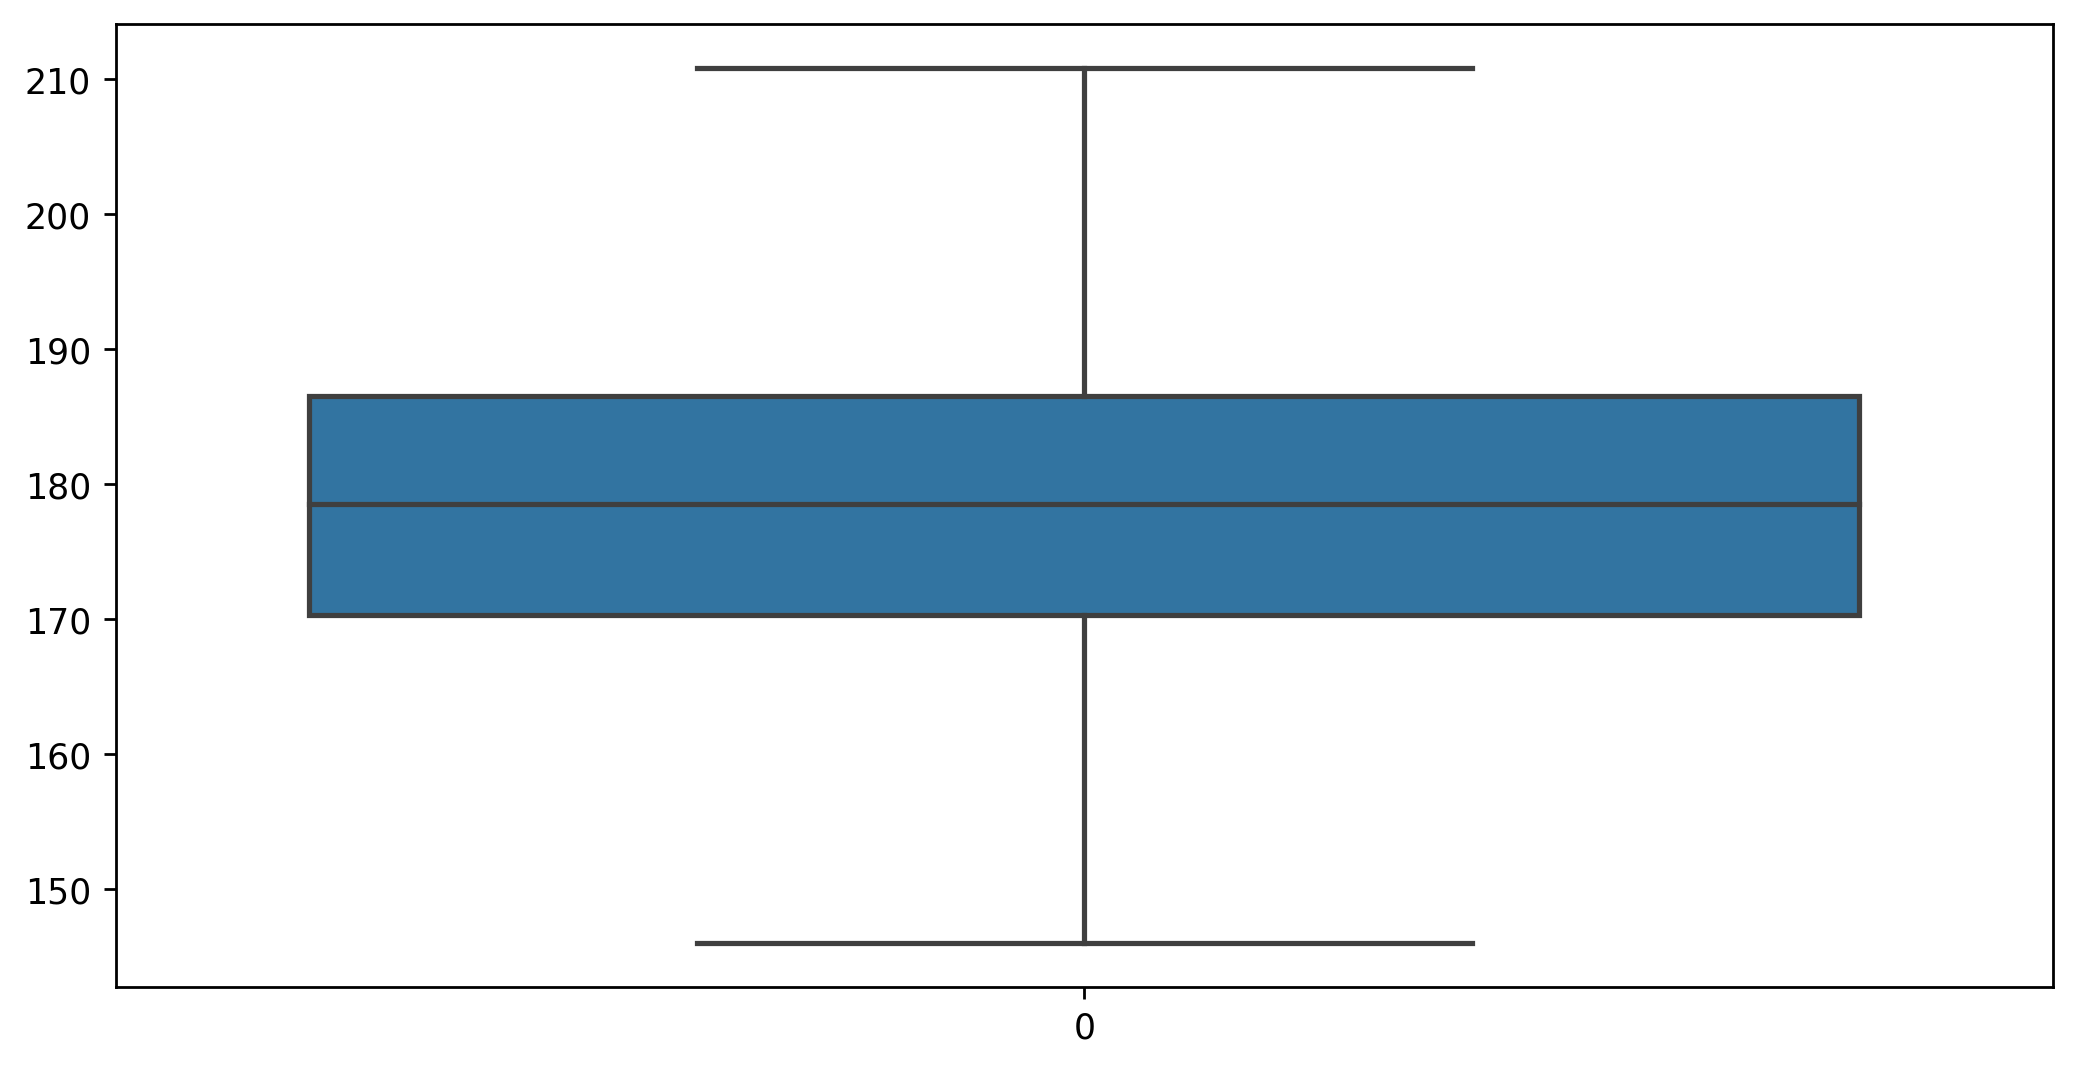

In [27]:
sns.boxplot(TAT_report['Laboratory 1'])

In [28]:
#The Similar Procedure would be followed for Lab4
def outlier_detection(colname):
    q1 = TAT_report['Laboratory 4'].quantile(0.25)
    q3 = TAT_report['Laboratory 4'].quantile(0.75)
    iqr = q3 - q1
    lower = (q1 - 1.5 * iqr)
    upper = (q3 + 1.5 * iqr)
    return lower, upper

In [29]:
l4,u4 = outlier_detection(TAT_report['Laboratory 4'])
l4

125.80125000000004

In [30]:
u4

201.13124999999997

In [31]:
TAT_report.loc[TAT_report['Laboratory 4'] > u4, 'Laboratory 4'] = u4
TAT_report.loc[TAT_report['Laboratory 4'] < l4, 'Laboratory 4'] = l4

<Axes: >

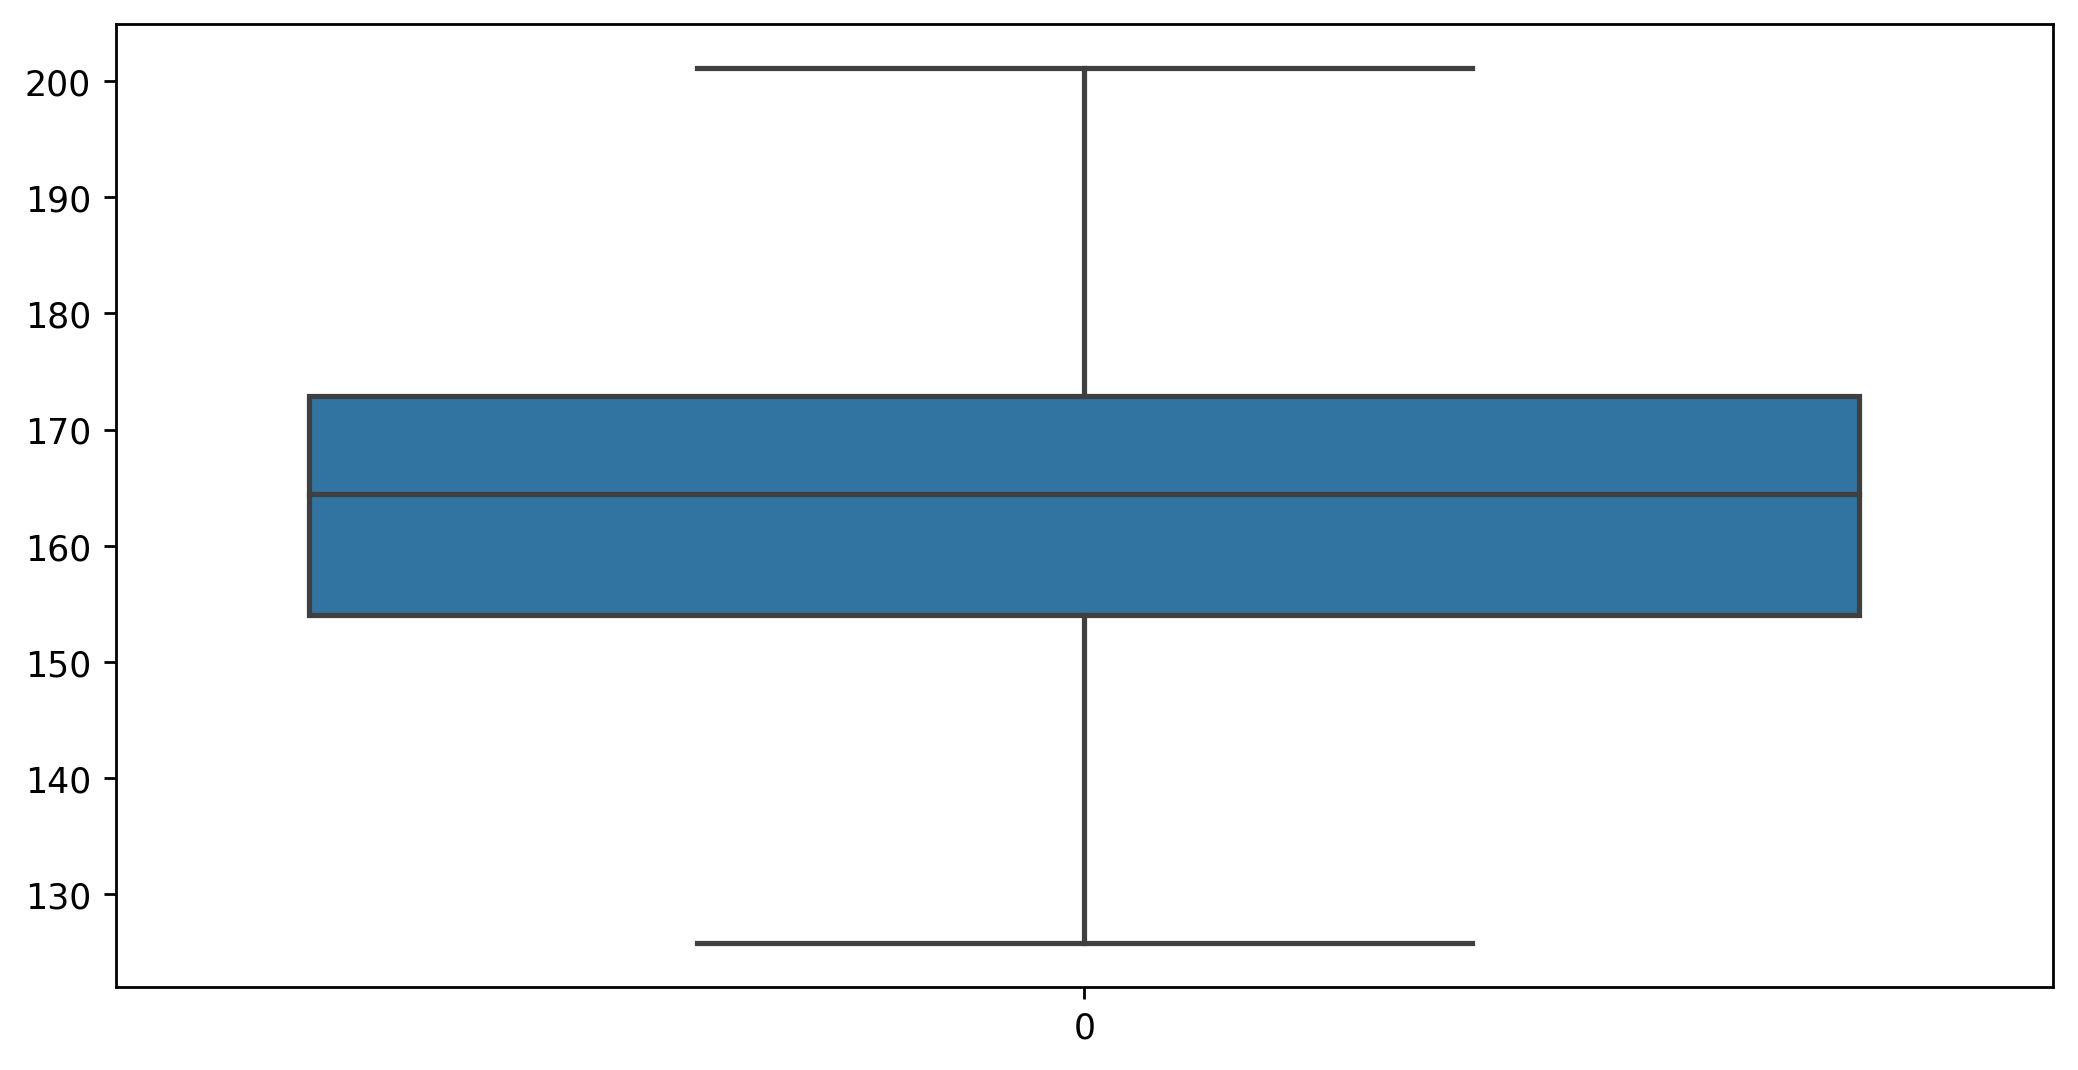

In [32]:
sns.boxplot(TAT_report['Laboratory 4'])

<Axes: >

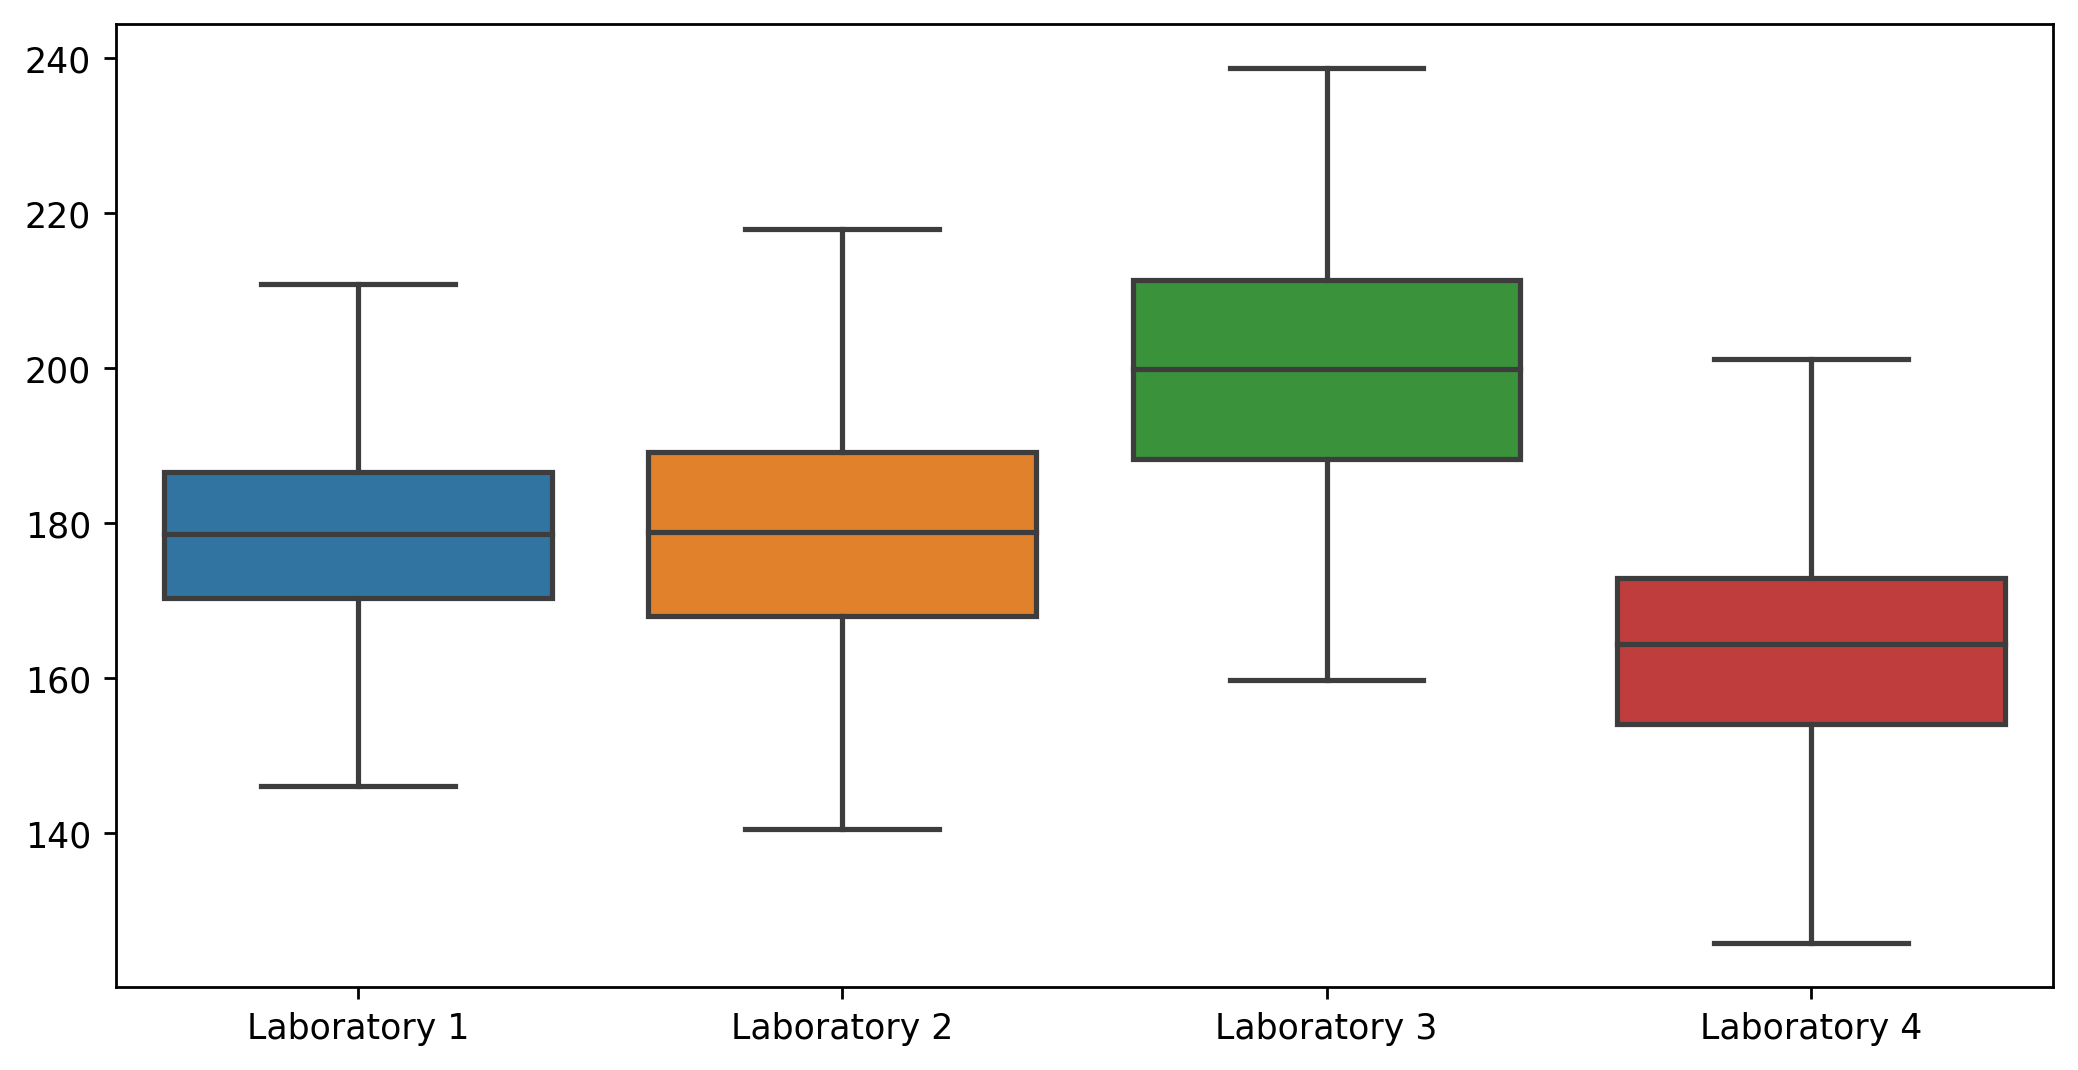

In [33]:
sns.boxplot(TAT_report)

In [34]:
#We have Capped the Outliers

In [35]:
TAT_report.skew()

Laboratory 1   -0.126101
Laboratory 2    0.040659
Laboratory 3    0.133584
Laboratory 4   -0.131117
dtype: float64

In [36]:
# The Problem statement is based on the comparision of more than 2 samples 
# To determine any difference in average TAT among the different laboratories we are going to implement the ANOVA test
''' Ho : Average of all laboratory are same
    Ha : Average of atleast 1 Laboratory is different
    Given significant level α = 0.05
if p < α (Reject Ho)
   p > α (Fail to Reject Ho)
'''

' Ho : Average of all laboratory are same\n    Ha : Average of atleast 1 Laboratory is different\n    Given significant level α = 0.05\nif p < α (Reject Ho)\n   p > α (Fail to Reject Ho)\n'

In [37]:
s, p = f_oneway(TAT_report['Laboratory 1'], TAT_report['Laboratory 2'], TAT_report['Laboratory 3'], TAT_report['Laboratory 4'])

In [38]:
p

4.278016523531409e-58

In [39]:
α = 0.05

In [40]:
#pValue ~ 0
if p < α :
    print('There is a difference in average TAT among the different Laboratories.')
else:
    print('There is no difference in average TAT among the different Laboratories.')

There is a difference in average TAT among the different Laboratories.


In [ ]:
# Q3

In [41]:
data = pd.read_csv(r"C:\Users\ahmed\Downloads\BuyerRatio.csv")
data

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [ ]:
''' We need to find if male-female buyer ratios are similar across different regions
Ho : male-female buyer ratios are independent
Ha : male female buyer ratios are similar across different regions
Here we have 2 statement
This could be resolved by using chi square test
Given α = 0.05
Here if chi_square value is less than critical value reject Ho
else fail to reject Ho
'''

In [69]:
x = data.iloc[:,1:5]
x

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [53]:
x.sum()

East      485
West     1665
North    1487
South     820
dtype: int64

In [56]:
x.iloc[0,:].sum()

393

In [59]:
x.iloc[1,:].sum()

4064

In [43]:
from scipy.stats import chi2_contingency

In [61]:
chi, pval , df, exp = stats.chi2_contingency([data['East'], data['West'], data['North'], data['South']])

In [62]:
chi, pval , df, exp

(1.5959455386610577,
 0.6603094907091882,
 3,
 array([[  42.76531299,  442.23468701],
        [ 146.81287862, 1518.18712138],
        [ 131.11756787, 1355.88243213],
        [  72.30424052,  747.69575948]]))

In [73]:
chi

1.5959455386610577

In [71]:
critical_value = stats.chi2.pdf(0.05, df = 3)

In [72]:
critical_value

0.08700369673862934

In [74]:
if chi < critical_value:
    print('male-female buyer ratios are similar across different regions')
else:
    print('male-female buyer ratios are independent')

male-female buyer ratios are independent


In [ ]:
# Q4

In [75]:
data = pd.read_csv(r"C:\Users\ahmed\Downloads\Costomer+OrderForm.csv")
data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [77]:
data.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [94]:
data.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [92]:
data[data == 'Error Free'].count()

Phillippines    271
Indonesia       267
Malta           269
India           280
dtype: int64

In [90]:
data[data == 'Defective'].count()

Phillippines    29
Indonesia       33
Malta           31
India           20
dtype: int64

In [99]:
freq_count = [{ 'Phillippines' : 271, 'Indonesia' : 267, 'Malta' : 269, 'India' : 280 },
              { 'Phillippines' : 29, 'Indonesia' : 33, 'Malta' : 31, 'India' : 20 }]
info = pd.DataFrame(freq_count, index = ['Error Free', 'Defective'])
info

,Phillippines,Indonesia,Malta,India
Error Free,271,267,269,280
Defective,29,33,31,20


In [ ]:
'''The manger wants to check weather the defective % varies by centre

Ho : Defective % varies
Ha : Defective % does not vary
Given α = 0.05
Here if chi_square value is less than critical value reject Ho
else fail to reject Ho
'''

In [100]:
chi, pval , df, exp = stats.chi2_contingency([info['Phillippines'], info['Indonesia'], info['Malta'], info['India']])

In [101]:
chi, pval , df, exp 

(3.8589606858203545,
 0.2771020991233144,
 3,
 array([[271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25]]))

In [109]:
chi

3.8589606858203545

In [106]:
critical_value = stats.chi2.pdf(0.05, df = 3)

In [107]:
critical_value

0.08700369673862934

In [108]:
if chi < critical_value:
    print('Defective % does not vary.')
else:
    print('Defective % varies.')

Defective % varies.
